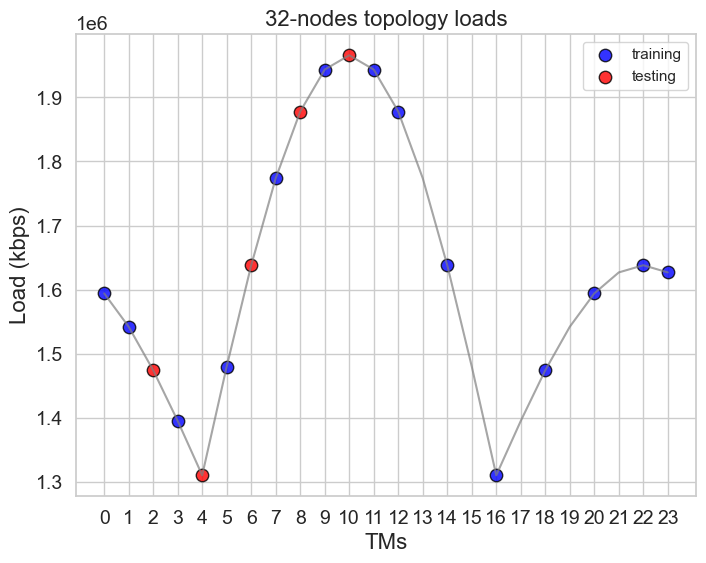

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Read TM information
with open("./32Nodes_tms_info_24tm.pkl", "rb") as f:
    static_od_bin, tms = pickle.load(f)

# Original Correspondence
tms_24_hours = [i for i in range(24)]  # Expected TM Time Label
index_tms = tms_24_hours[20:] + tms_24_hours[:20]  # The corresponding index in tms

# Get the corresponding TM load
tms_14 = [tms[i] for i in index_tms]
total_load_tms_14 = [np.array(tm).sum() for tm in tms_14]

# Corrected training set index (corresponding to `tms_24_hours`)
train_hours = [0, 1, 3, 5, 7, 9, 11, 12, 14, 16, 18, 20, 22, 23]
train_indices = [tms_24_hours.index(h) for h in train_hours] 

# Corrected test set index (directly corresponds to `tms_24_hours`)
original_test_indices = [2, 4, 6, 8, 10]
test_indices = [tms_24_hours.index(i) for i in original_test_indices]

train_only = set(train_indices)
test_only = set(test_indices)

# --- Drawing ---
plt.figure(figsize=(8, 6))

# Training set (blue)
train_only_x = [tms_24_hours[i] for i in train_only]
train_only_y = [total_load_tms_14[i] for i in train_only]
plt.scatter(train_only_x, train_only_y, color="blue", label="training", s=80, alpha=0.8, edgecolors='black')

# Test set (red)
test_only_x = [tms_24_hours[i] for i in test_only]
test_only_y = [total_load_tms_14[i] for i in test_only]
plt.scatter(test_only_x, test_only_y, color="red", label="testing", s=80, alpha=0.8, edgecolors='black')

# Set the X axis to correspond to the correct `tms_24_hours`
plt.xticks(tms_24_hours)
plt.plot(range(len(total_load_tms_14)), total_load_tms_14, linestyle='-', marker='', color="gray", alpha=0.7)
# Chart titles and labels
plt.title("32-nodes topology loads", fontsize=16)
plt.xlabel("TMs", fontsize=16)
plt.ylabel("Load (kbps)", fontsize=16)

plt.xticks(fontsize=14)
ax = plt.gca()
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.yaxis.get_offset_text().set_fontsize(14)
ax.tick_params(axis='y', labelsize=14)

# legend
plt.legend()
plt.grid(True)
plt.tight_layout
plt.savefig("24tm.svg", format='svg', bbox_inches='tight')


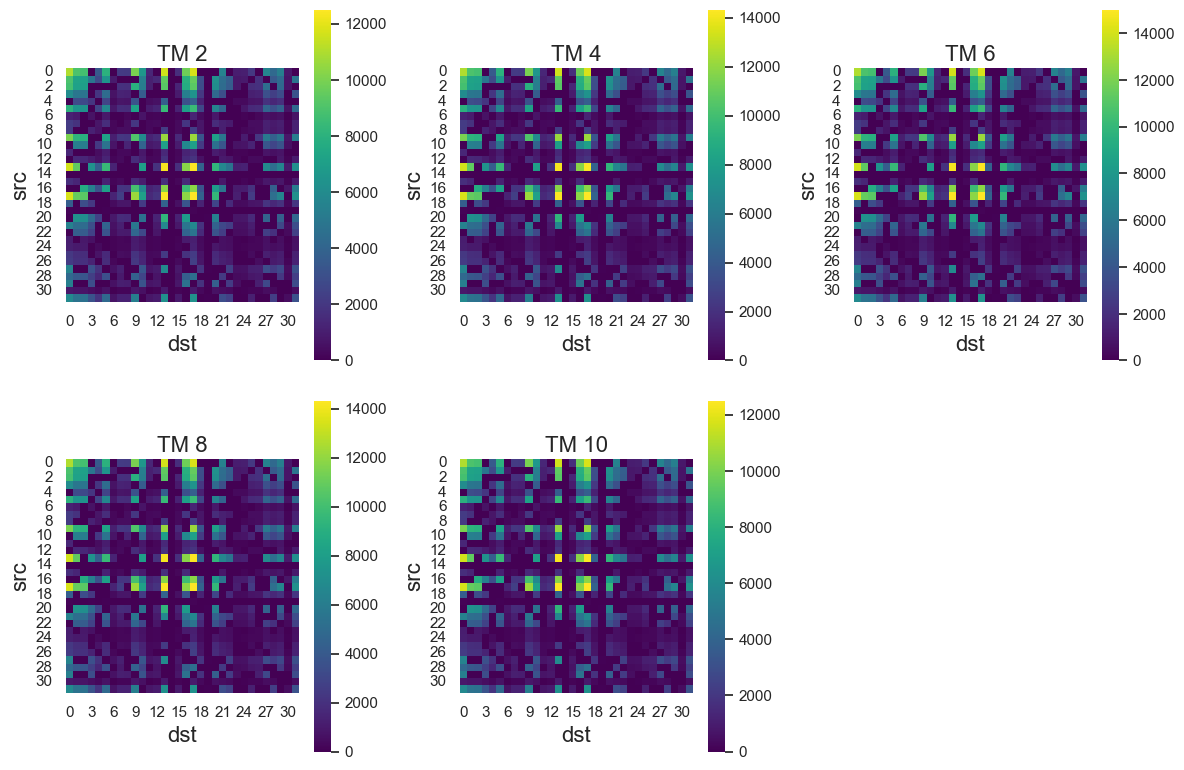

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

pkl_file = '32Nodes_tms_info_24tm.pkl'

with open(pkl_file, 'rb') as f:
    od_bin, tms_24 = pickle.load(f)

sns.set(style="whitegrid")

# Show only these specific TMs
tms_24_hours = [i for i in range(24)]
index_tms = tms_24_hours[20:] + tms_24_hours[:20]
selected_indices = [2, 4, 6, 8, 10]
or_selected_indices = [index_tms[i] for i in selected_indices]

rows, cols = 2, 3

# Adjust `figsize` to keep each subfigure square
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))  

# Flatten into a 1D array for easy looping
axes = axes.flatten()

for i, tm_idx in enumerate(selected_indices):
    ax = axes[i]
    tm = np.array(tms_24[tm_idx]) 
    
    sns.heatmap(tm, annot=False, cmap='viridis', cbar=True, ax=ax, square=True)  
    
    ax.set_title(f"TM {tm_idx}", fontsize=16)
    ax.set_xlabel("dst", fontsize=16)
    ax.set_ylabel("src", fontsize=16)

# Remove extra empty subplots (if selected_indices length < rows*cols)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

# Adjust the layout to ensure that the graphics are not squeezed or deformed
plt.tight_layout()
plt.savefig("32-node 24tm heatmap.svg", format='svg', bbox_inches='tight')
plt.show()


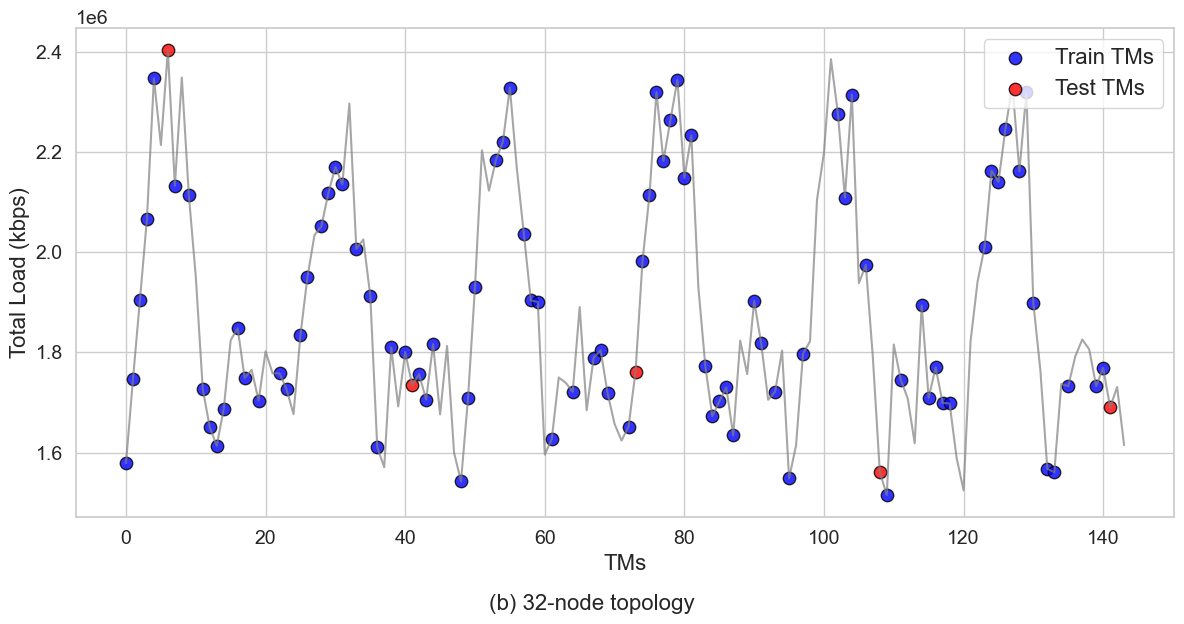

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

with open("./32Nodes_tms_info_144tm.pkl", "rb") as f:
    static_od_bin, tms = pickle.load(f)

with open("./train_indices.pkl", "rb") as f:
    train_indices = pickle.load(f)

total_load = [np.array(tm).sum() for tm in tms]

test_indices = [6, 41, 73, 108, 141]

plt.figure(figsize=(12, 6))

plt.plot(range(len(total_load)), total_load, linestyle='-', marker='', color="gray", alpha=0.7)

plt.scatter(train_indices, [total_load[i] for i in train_indices], 
            color="blue", label="Train TMs", s=80, alpha=0.8, edgecolors='black')

plt.scatter(test_indices, [total_load[i] for i in test_indices], 
            color="red", label="Test TMs", s=80, alpha=0.8, edgecolors='black')

plt.figtext(0.5, -0.03, "(b) 32-node topology", fontsize=16, ha='center')
plt.xlabel("TMs", fontsize=16)
plt.ylabel("Total Load (kbps)", fontsize=16)
plt.legend(prop={'size': 16})

plt.xticks(fontsize=14)
ax = plt.gca()
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.yaxis.get_offset_text().set_fontsize(14)
ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.savefig("144tm.svg", format='svg', bbox_inches='tight') 
plt.show()


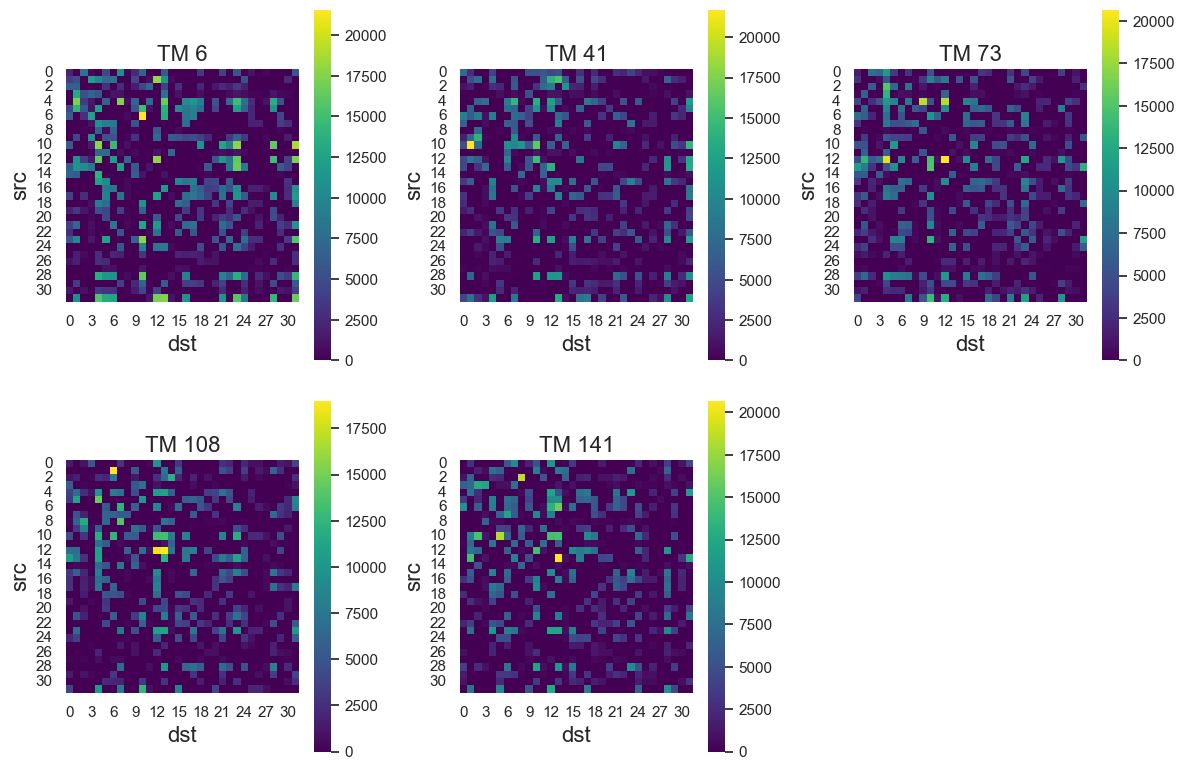

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pkl_file = '32Nodes_tms_info_144tm.pkl'

with open(pkl_file, 'rb') as f:
    od_bin, tms_144 = pickle.load(f)

sns.set(style="whitegrid")

selected_indices = [6, 41, 73, 108, 141]

rows, cols = 2, 3

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))  

axes = axes.flatten()

for i, tm_idx in enumerate(selected_indices):
    ax = axes[i]
    tm = np.array(tms_144[tm_idx])
    
    sns.heatmap(tm, annot=False, cmap='viridis', cbar=True, ax=ax, square=True)  
    
    ax.set_title(f"TM {tm_idx}", fontsize=16)
    ax.set_xlabel("dst", fontsize=16)
    ax.set_ylabel("src", fontsize=16)

for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.savefig("32-node heatmap.svg", format='svg', bbox_inches='tight')
plt.show()


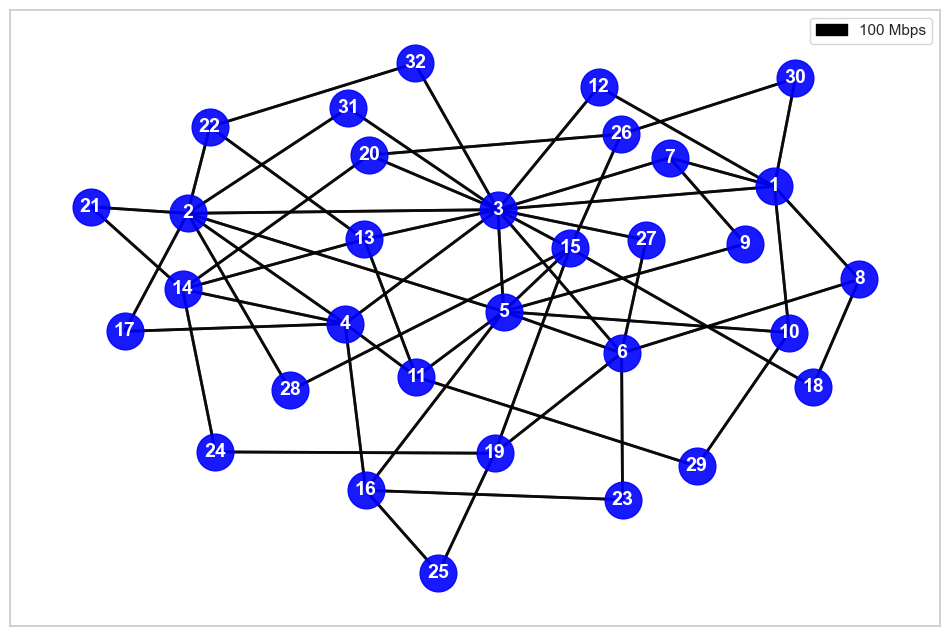

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# link data
with open("../bw_r.txt", "r") as file:
    link_data = file.read()

# Parsing data and building a NetworkX graph
G = nx.Graph()
edges = []

for line in link_data.strip().split("\n"):
    src, dst, _, capacity = map(float, line.split(","))
    G.add_edge(int(src), int(dst), capacity=capacity)
    edges.append((int(src), int(dst), capacity))

pos = nx.kamada_kawai_layout(G)

pos[1] = (pos[1][0] + 0.1, pos[1][1])
pos[2] = (pos[2][0] - 0.25, pos[2][1] + 0.05)
pos[7] = (pos[7][0], pos[7][1] - 0.1)
pos[8] = (pos[8][0], pos[8][1] + 0.05)
pos[9] = (pos[9][0] - 0.05, pos[9][1])
pos[10] = (pos[10][0] + 0.1, pos[10][1])
pos[11] = (pos[11][0] - 0.05, pos[11][1] + 0.075)
pos[13] = (pos[13][0] + 0.05, pos[13][1] + 0.03)
pos[14] = (pos[14][0] , pos[14][1])
pos[15] = (pos[15][0], pos[15][1] + 0.2)
pos[16] = (pos[16][0] - 0.1, pos[16][1] - 0.1)
pos[26] = (pos[26][0] + 0.1, pos[26][1])
pos[28] = (pos[28][0], pos[28][1] - 0.15)

# Define link color to change based on capacity
color_map = []
edge_width = []
for _, _, capacity in edges:
    color_map.append("black")
    edge_width.append(2)

# Draw a topology diagram
plt.figure(figsize=(12, 8))

# Draw Node
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="blue", alpha=0.9)

# Draw edges using custom colors
edges_list = [(src, dst) for src, dst, _ in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges_list, edge_color=color_map, width=edge_width, alpha=0.8)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=14, font_color="white", font_weight="bold")

# Legend
legend_patches = [
    mpatches.Patch(color="black", label="100 Mbps")
]
plt.legend(handles=legend_patches, loc="upper right")
plt.grid(False)
plt.show()

import json
with open("pos.json", "w") as f:
    json.dump({k: list(v) for k, v in pos.items()}, f)